In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
import nltk



plt.style.use('ggplot')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ravindergalley/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ravindergalley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ravindergalley/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/ravindergalley/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/ravindergalley/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ravindergalley/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import sys
print(sys.executable)
print(sys.path)


/opt/anaconda3/bin/python
['/Users/ravindergalley/Downloads', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa']


In [3]:
df = pd.read_csv('/Users/ravindergalley/Desktop/Reviews.csv')
df = df.head(500)
print(df.shape)

(500, 10)


In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## PLOTTING THE REVIEWS ON THE GRAPH

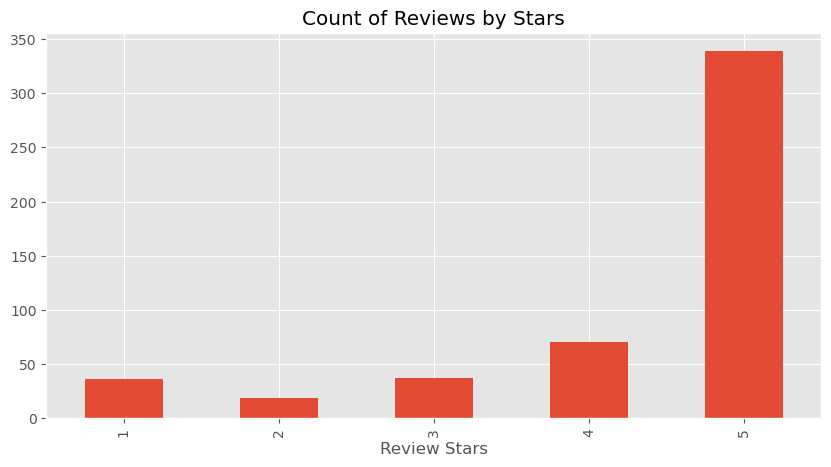

In [5]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar', 
          title='Count of Reviews by Stars', 
          figsize=(10,5))
    
ax.set_xlabel('Review Stars')
plt.show()

In [6]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


## BASIC NLTK 


In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADER SENTIMENT SCORING
### --> uses a 'bag of words' approach
### --> stop words are removed
### --> each word is scored and combined to a total score

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


### Running the polarity scores on a singular review text 

In [11]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

### Running the polarity scores on the entire dataset

In [12]:

sia = SentimentIntensityAnalyzer()
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myId = row['Id']
    res[myId] = sia.polarity_scores(text)
    
   

  0%|          | 0/500 [00:00<?, ?it/s]

# Sentiment Score

In [13]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [14]:

vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


# Plot VADER results


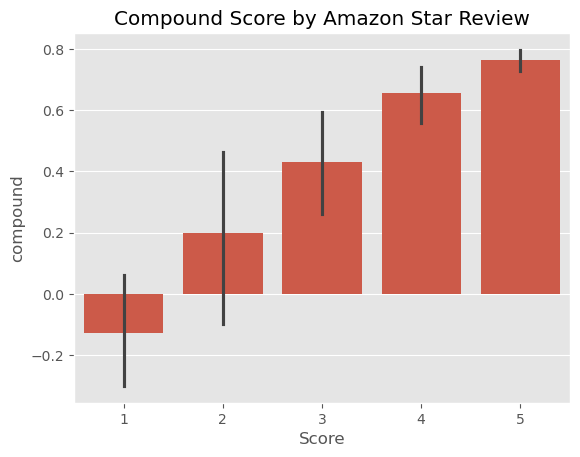

In [15]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

<Axes: xlabel='Score', ylabel='pos'>

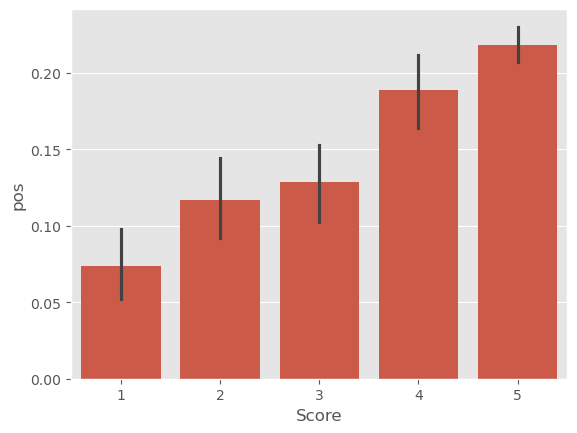

In [16]:
sns.barplot(data=vaders, x='Score', y='pos')

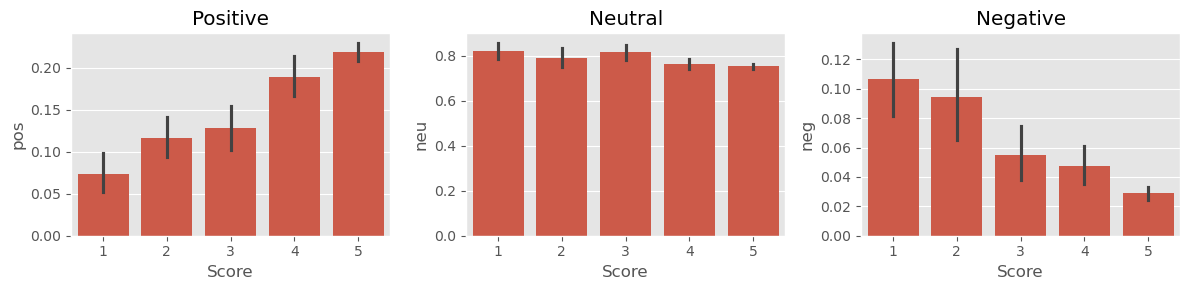

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# RoBERTa Pretrained Model
### --> use a model trained of a large corpus of data
### --> Transformer model accounts for the words but also the context related to other text

In [18]:
!pip install transformers

import transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [20]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [21]:
# Running for RoBERTa model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)
    


{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687481, 'roberta_pos': 0.0029573753}


In [22]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict


    

In [23]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try: 
        text = row['Text']
        myId = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        #Combining both dict
        both = {**vader_result_rename, **roberta_result}
        res[myId] = both
    except RuntimeError :
        print(f'Broke for id {myId}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [24]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

# Compare Scores between Models

In [25]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

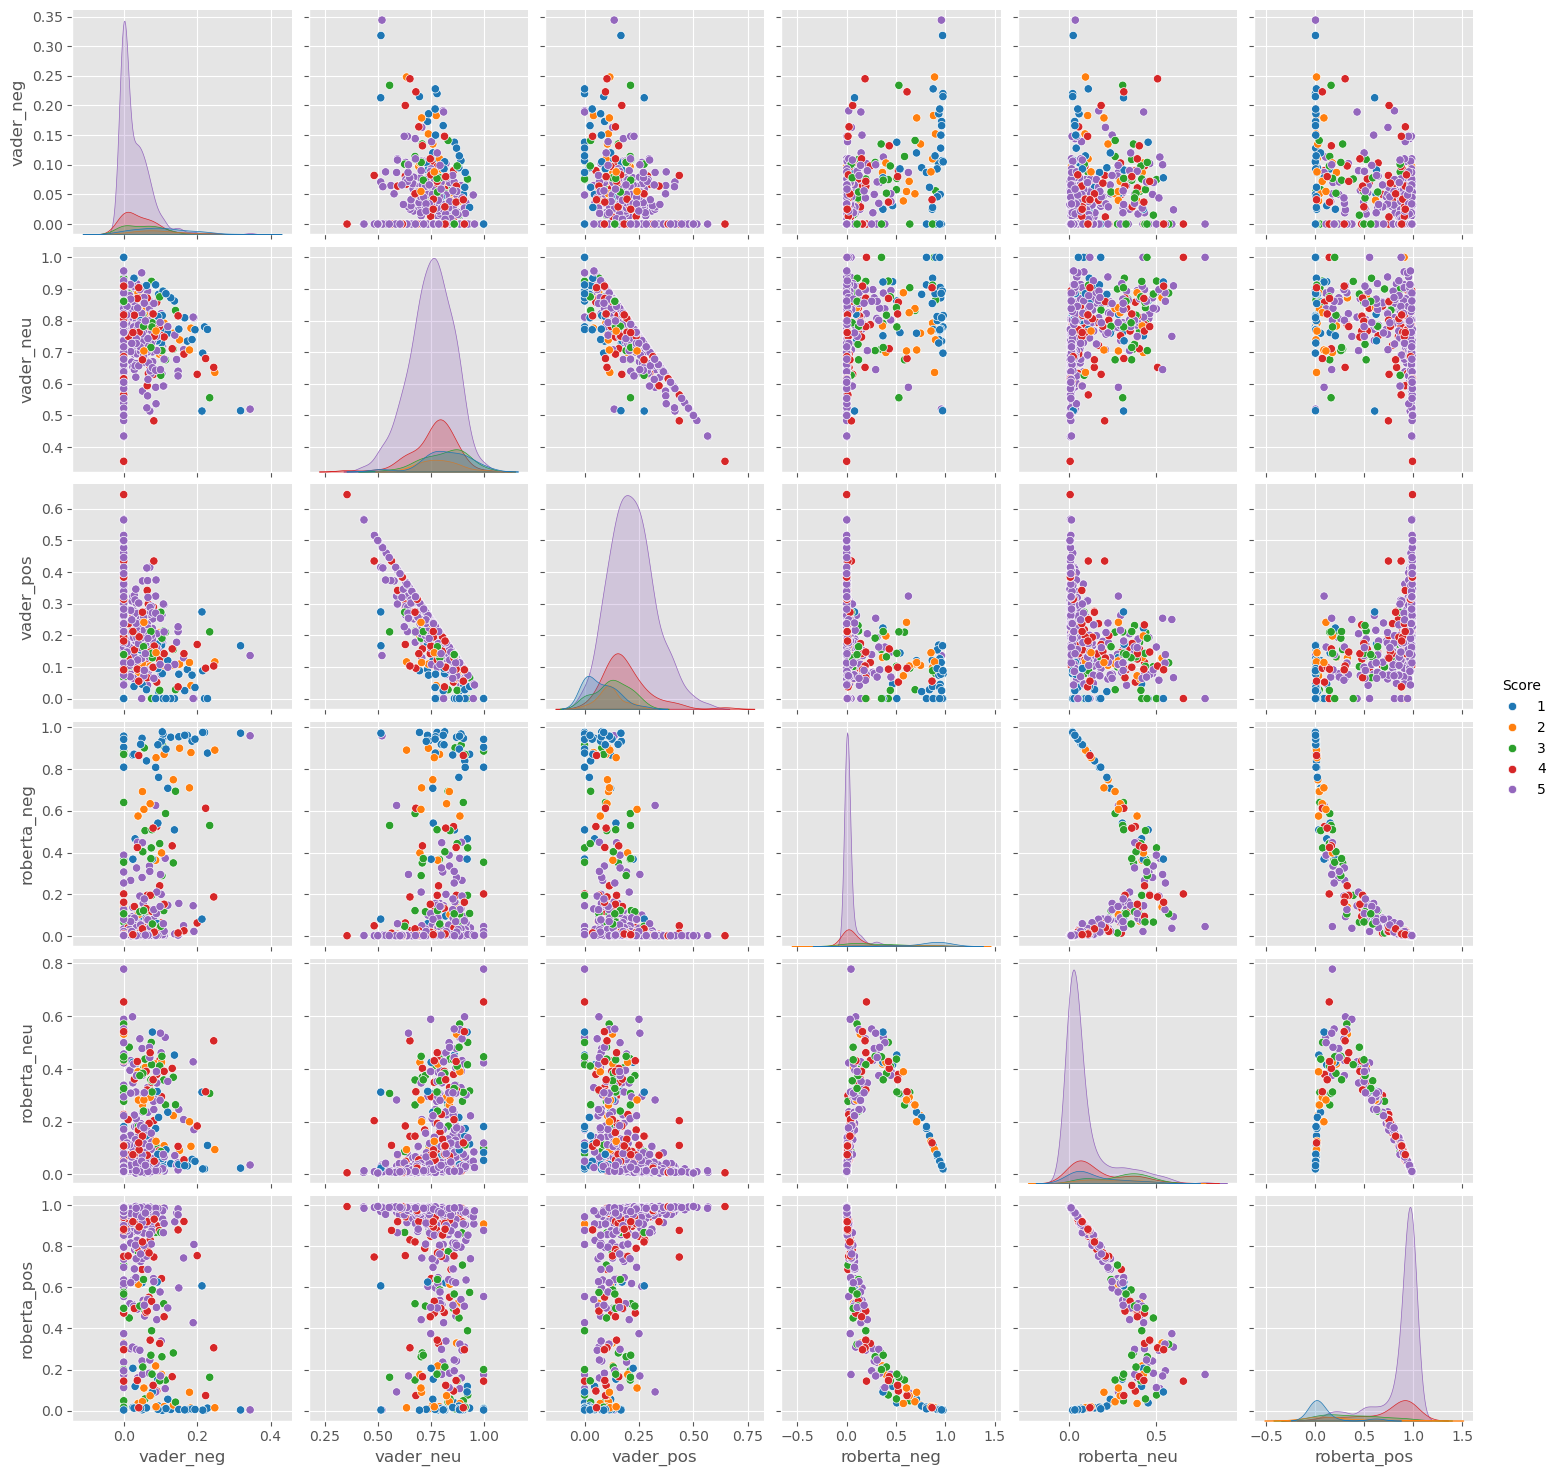

In [26]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette= 'tab10')
plt.show()


# VADER Hyperparameter Training

In [27]:
def tune_vader_thresholds(df, sia, thresholds):
    best_threshold = {'pos': 0.5, 'neu': 0.5, 'neg': 0.5}
    best_accuracy = 0
    
    for pos_th, neu_th, neg_th in thresholds:
        correct = 0
        for i, row in df.iterrows():
            text = row['Text']
            score = row['Score']
            vader_result = sia.polarity_scores(text)
            compound = vader_result['compound']
            if compound >= pos_th:
                pred = 5
            elif compound >= neu_th:
                pred = 3
            elif compound >= neg_th:
                pred = 1
            if pred == score:
                correct += 1
        accuracy = correct / len(df)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = {'pos': pos_th, 'neu': neu_th, 'neg': neg_th}
    
    return best_threshold, best_accuracy

thresholds = [(0.2, 0.1, -0.1), (0.3, 0.2, -0.2), (0.4, 0.3, -0.3), (0.5, 0.4, -0.4)]
best_threshold, best_accuracy = tune_vader_thresholds(df, sia, thresholds)
print("Best thresholds:", best_threshold)
print("Best accuracy:", best_accuracy)

Best thresholds: {'pos': 0.4, 'neu': 0.3, 'neg': -0.3}
Best accuracy: 0.678


In [28]:
##FINER GRANULARITY
import numpy as np
from sklearn.model_selection import train_test_split

def tune_vader_thresholds(df, sia, thresholds):
    best_threshold = {'pos': 0.5, 'neu': 0.5, 'neg': 0.5}
    best_accuracy = 0
    
    X_train, X_val = train_test_split(df, test_size=0.2, random_state=42)
    
    for pos_th in thresholds:
        for neu_th in thresholds:
            for neg_th in thresholds:
                correct = 0
                for i, row in X_val.iterrows():
                    text = row['Text']
                    score = row['Score']
                    vader_result = sia.polarity_scores(text)
                    compound = vader_result['compound']
                    if compound >= pos_th:
                        pred = 5
                    elif compound >= neu_th:
                        pred = 3
                    elif compound >= neg_th:
                        pred = 1
                    else:
                        pred = 0
                    if pred == score:
                        correct += 1
                accuracy = correct / len(X_val)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_threshold = {'pos': pos_th, 'neu': neu_th, 'neg': neg_th}
    
    return best_threshold, best_accuracy

# Define a finer granularity for thresholds
thresholds = np.linspace(0, 1, 20)  # This will generate thresholds from 0 to 1 with a step of 0.1
best_threshold, best_accuracy = tune_vader_thresholds(df, sia, thresholds)
print("Best thresholds:", best_threshold)
print("Best accuracy:", best_accuracy)


Best thresholds: {'pos': 0.5263157894736842, 'neu': 0.3684210526315789, 'neg': 0.0}
Best accuracy: 0.69


In [29]:
#Combining VADER with a machine learning model like SVM or a neural network.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC(kernel='linear'))
])

X_train, X_val = train_test_split(df, test_size=0.2, random_state=42)
pipeline.fit(X_train['Text'], X_train['Score'])

predictions = pipeline.predict(X_val['Text'])
accuracy = accuracy_score(X_val['Score'], predictions)
print("SVM Model Accuracy:", accuracy)


SVM Model Accuracy: 0.71


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Combine VADER scores with TF-IDF features in an ML model
df['vader_compound'] = df['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Using TF-IDF and VADER in a pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # TF-IDF feature extraction
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression
])

# Split data
X_train, X_val, y_train, y_val = train_test_split(df[['Text']], df['Score'], test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train['Text'], y_train)

# Predict and evaluate
predictions = pipeline.predict(X_val['Text'])
accuracy = accuracy_score(y_val, predictions)
print("Accuracy with combined VADER and TF-IDF:", accuracy)


Accuracy with combined VADER and TF-IDF: 0.71


## Combining VADER with TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define a custom transformer for VADER
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.sentiment import SentimentIntensityAnalyzer

class VaderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.sia = SentimentIntensityAnalyzer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([list(self.sia.polarity_scores(text).values()) for text in X])

# Data and pipeline
df = pd.read_csv('/Users/ravindergalley/Desktop/Reviews.csv')
X = df['Text']
y = df['Score']

tfidf = TfidfVectorizer()
vader = VaderTransformer()

combined_features = FeatureUnion(
    transformer_list=[
        ('tfidf', tfidf),
        ('vader', vader)
    ]
)

pipeline = Pipeline([
    ('features', combined_features),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print("Logistic Regression Model Accuracy with Combined Features:", accuracy)


Logistic Regression Model Accuracy with Combined Features: 0.7608253951500119


In [32]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

# Example DataFrame
# Assuming you have a DataFrame with 'Text' and 'Sentiment' columns
# data = pd.DataFrame({'Text': [...], 'Sentiment': [...]})

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Define a function to get VADER features
def get_vader_features(texts):
    return np.array([analyzer.polarity_scores(text)['compound'] for text in texts]).reshape(-1, 1)

# Define custom transformer for VADER
class VaderFeatureExtractor:
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return get_vader_features(X)

# Prepare your data
X_train, X_val, y_train, y_val = train_test_split(df['Text'], df['Score'], test_size=0.2, random_state=42)

# Define TF-IDF and VADER feature extraction
tfidf = TfidfVectorizer()
vader = VaderFeatureExtractor()

# Combine TF-IDF and VADER features
combined_features = FeatureUnion([
    ('tfidf', tfidf),
    ('vader', vader)
])

# Define the pipeline
pipeline = Pipeline([
    ('features', combined_features),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train and evaluate the model
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_val)
accuracy = accuracy_score(y_val, predictions)

print(f"Combined TF-IDF and VADER Accuracy: {accuracy}")


Combined TF-IDF and VADER Accuracy: 0.7597347195468419


In [33]:
import os

# Set this environment variable to suppress the warning
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Your existing imports and code
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.sentiment import SentimentIntensityAnalyzer

# Rest of your code...


# Text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalpha()]
    lemmatizer = nltk.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

# Load data
df = pd.read_csv('/Users/ravindergalley/Desktop/Reviews.csv')
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data
df_sample['cleaned_text'] = df_sample['Text'].apply(preprocess_text)

# Vader Transformer
class VaderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.sia = SentimentIntensityAnalyzer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([self.sia.polarity_scores(text)['compound'] for text in X]).reshape(-1, 1)

# Split data
X_train, X_val, y_train, y_val = train_test_split(df_sample['cleaned_text'], df_sample['Score'], test_size=0.2, random_state=42)

# Combine TF-IDF and VADER features
tfidf = TfidfVectorizer()
vader = VaderTransformer()

combined_features = FeatureUnion([
    ('tfidf', tfidf),
    ('vader', vader)
])

pipeline = Pipeline([
    ('features', combined_features),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'features__tfidf__ngram_range': [(1, 1), (1, 2)]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

# Predict and evaluate
predictions = best_model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
precision = precision_score(y_val, predictions, average='weighted')
recall = recall_score(y_val, predictions, average='weighted')
f1 = f1_score(y_val, predictions, average='weighted')

print("Best Model Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Fit the best model on the entire training data
best_model.fit(X_train, y_train)




/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Model Accuracy: 0.7582900870788988
Precision: 0.7279612883852834
Recall: 0.7582900870788988
F1 Score: 0.7337416272898614


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tfidf',
                                                 TfidfVectorizer(ngram_range=(1,
                                                                              2))),
                                                ('vader',
                                                 VaderTransformer())])),
                ('classifier', LogisticRegression(C=10, max_iter=1000))])

In [34]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from scipy.sparse import hstack

# Load data
df = pd.read_csv('/Users/ravindergalley/Desktop/Reviews.csv')

# Preprocess text
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalpha()]
    lemmatizer = nltk.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

df['cleaned_text'] = df['Text'].apply(preprocess_text)

# Split data
X_train, X_val, y_train, y_val = train_test_split(df['cleaned_text'], df['Score'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))  # Reduced features
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

# VADER Sentiment Scores
sia = SentimentIntensityAnalyzer()

def vader_sentiment_scores(texts):
    return np.array([sia.polarity_scores(text)['compound'] for text in texts]).reshape(-1, 1)

X_train_vader = vader_sentiment_scores(X_train)
X_val_vader = vader_sentiment_scores(X_val)

# Combine TF-IDF and VADER features using sparse matrix
X_train_combined = hstack((X_train_tfidf, X_train_vader))
X_val_combined = hstack((X_val_tfidf, X_val_vader))

# Logistic Regression Model
clf = LogisticRegression(max_iter=1000, solver='saga')  # Using 'saga' solver
clf.fit(X_train_combined, y_train)

# Evaluate
predictions = clf.predict(X_val_combined)
accuracy = accuracy_score(y_val, predictions)
print("Combined Model Accuracy:", accuracy)
print(classification_report(y_val, predictions))


Combined Model Accuracy: 0.734534835651019
              precision    recall  f1-score   support

           1       0.62      0.66      0.64     10326
           2       0.41      0.18      0.25      5855
           3       0.44      0.30      0.36      8485
           4       0.50      0.24      0.33     16123
           5       0.80      0.95      0.87     72902

    accuracy                           0.73    113691
   macro avg       0.55      0.47      0.49    113691
weighted avg       0.69      0.73      0.70    113691



# RoBERTa Hyperparameter Tuning

In [36]:
import pandas as pd
import numpy as np
import torch
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator, TransformerMixin
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments

# Set device to CPU
device = torch.device("cpu")
torch.set_default_tensor_type(torch.FloatTensor)

print("Using device:", device)

# Ensure the default tensor type is on CPU
torch.set_default_tensor_type('torch.FloatTensor')

# Text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalpha()]
    lemmatizer = nltk.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

# Load data
df = pd.read_csv('/Users/ravindergalley/Desktop/Reviews.csv')
df['cleaned_text'] = df['Text'].apply(preprocess_text)

# Vader Transformer for sentiment analysis
class VaderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.sia = SentimentIntensityAnalyzer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([self.sia.polarity_scores(text)['compound'] for text in X]).reshape(-1, 1)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df['cleaned_text'], df['Score'], test_size=0.2, random_state=42)

# Adjust labels to start at 0 (if necessary)
y_train = y_train - 1
y_val = y_val - 1

# TF-IDF and VADER features
tfidf = TfidfVectorizer()
vader = VaderTransformer()

combined_features = FeatureUnion([
    ('tfidf', tfidf),
    ('vader', vader)
])

# Logistic Regression pipeline
pipeline = Pipeline([
    ('features', combined_features),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train and evaluate Logistic Regression model
pipeline.fit(X_train, y_train)

# Evaluate the Logistic Regression model
predictions = pipeline.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
precision = precision_score(y_val, predictions, average='weighted')
recall = recall_score(y_val, predictions, average='weighted')
f1 = f1_score(y_val, predictions, average='weighted')

print("Logistic Regression Model Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Load RoBERTa tokenizer and model with the correct number of labels
num_labels = len(np.unique(y_train))  # Dynamically determine the number of labels
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_labels)

# Move model to CPU
model.to(device)

# Tokenization and encoding
def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True, max_length=128)

# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Tokenize and encode the datasets
train_encodings = tokenize_function(X_train.tolist())
val_encodings = tokenize_function(X_val.tolist())

train_dataset = Dataset(train_encodings, y_train.tolist())
val_dataset = Dataset(val_encodings, y_val.tolist())

# Set training arguments for RoBERTa
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,  # Adjust as necessary
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    no_cuda=True,  # Force no CUDA usage
)

# Define RoBERTa trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train the RoBERTa model
trainer.train()

# Evaluate the RoBERTa model
eval_result = trainer.evaluate()
print(f"RoBERTa Evaluation Result: {eval_result}")


Using device: cpu
Logistic Regression Model Accuracy: 0.7545803977447643
Precision: 0.7223379599425167
Recall: 0.7545803977447643
F1 Score: 0.7261813240452628


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/lib/python3.12/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/transformers/training_args.py:1540: FutureWarning: using `no_cuda` is deprecated and will be removed in version 5.0 of 🤗 Transformers. Use `use_cpu` instead
  warnings.warn(


  0%|          | 0/170538 [00:00<?, ?it/s]

{'loss': 1.5227, 'grad_norm': 3.3269386291503906, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.0}
{'loss': 1.4782, 'grad_norm': 7.396002769470215, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.0}
{'loss': 1.4982, 'grad_norm': 3.7023141384124756, 'learning_rate': 3e-06, 'epoch': 0.0}
{'loss': 1.4252, 'grad_norm': 7.334383010864258, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.0}
{'loss': 1.4139, 'grad_norm': 4.161965370178223, 'learning_rate': 5e-06, 'epoch': 0.0}
{'loss': 1.2452, 'grad_norm': 7.583786964416504, 'learning_rate': 6e-06, 'epoch': 0.0}
{'loss': 1.2409, 'grad_norm': 6.33095121383667, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.0}
{'loss': 1.2587, 'grad_norm': 10.876077651977539, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.0}
{'loss': 0.9429, 'grad_norm': 6.379574298858643, 'learning_rate': 9e-06, 'epoch': 0.0}
{'loss': 1.1634, 'grad_norm': 10.491740226745605, 'learning_rate': 1e-05, 'epoch': 0.0}
{'loss': 1.1382, 'grad_norm': 7.2067723274230

KeyboardInterrupt: 

In [38]:
import pandas as pd
import numpy as np
import torch
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator, TransformerMixin
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments

# Set device to CPU
device = torch.device("cpu")
torch.set_default_tensor_type(torch.FloatTensor)

# Ensure the default tensor type is on CPU
torch.set_default_tensor_type('torch.FloatTensor')

# Text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalpha()]
    lemmatizer = nltk.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

# Load data
df = pd.read_csv('/Users/ravindergalley/Desktop/Reviews.csv')
df['cleaned_text'] = df['Text'].apply(preprocess_text)

# Vader Transformer for sentiment analysis
class VaderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.sia = SentimentIntensityAnalyzer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([self.sia.polarity_scores(text)['compound'] for text in X]).reshape(-1, 1)

# Initialize RoBERTa model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
num_labels = len(df['Score'].unique())
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_labels)
model.to(device)

# Training function for each chunk
def train_chunk(X_chunk, y_chunk, model, trainer, train_dataset):
    # Tokenize and encode the chunk
    train_encodings = tokenizer(X_chunk.tolist(), padding="max_length", truncation=True, max_length=128)
    train_dataset = Dataset(train_encodings, y_chunk.tolist())
    
    # Define Trainer with the same training arguments
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,  # you can evaluate on a fixed validation set
    )
    
    # Train on the current chunk
    trainer.train()

# Training in chunks
chunk_size = 10000
for i in range(0, len(df), chunk_size):
    # Get a chunk of data
    X_chunk = df['cleaned_text'].iloc[i:i+chunk_size]
    y_chunk = df['Score'].iloc[i:i+chunk_size] - 1  # Adjust labels to start at 0
    
    # Train on the current chunk
    train_chunk(X_chunk, y_chunk, model, trainer, train_dataset)

# Save the model after training on all chunks
model.save_pretrained('./trained_roberta_model')


KeyboardInterrupt: 

## Positive Sentiment 1-Star Review

In [ ]:
##Finding where the RoBERTa model got confused (giving negative reviews on +ve ones)
results_df.query('Score == 1')  \
    .sort_values('roberta_pos',ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

## An example of Sarcastic Review (Model got confused)

In [ ]:
##Finding where the VADER model got confused (As this is a sarcastic review given by a customer and it couldn't catch up)
results_df.query('Score == 1')  \
    .sort_values('vader_pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

## Negative Sentiment 5-Star Review

In [ ]:
##Finding where the RoBERTa model got confused (giving positive reviews on -ve ones)
results_df.query('Score == 5')  \
    .sort_values('roberta_neg',ascending=False)['Text'].values[0]


'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
##Finding where the VADER model got confused (giving positive reviews on -ve ones)
results_df.query('Score == 5')  \
    .sort_values('vader_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# CONCLUSION
### In this project, we compared the performance of two sentiment analysis models: VADER (Valence Aware Dictionary and sEntiment Reasoner) and RoBERTa (a robustly optimized BERT pretraining approach). The VADER model, being rule-based, is designed specifically for sentiment analysis and performs efficiently with short texts such as social media posts, making it quick and interpretable. However, its reliance on predefined rules and lexicons can limit its adaptability to more complex and nuanced text. 

### On the other hand, the RoBERTa model, which is a deep learning model based on the transformer architecture, excels in understanding the context of words in longer texts. It can capture subtle sentiments more effectively than VADER, thanks to its ability to model language representations in a more sophisticated manner. However, this comes at the cost of increased computational requirements and the need for large datasets for training.

### In summary, while VADER provides a fast and interpretable approach to sentiment analysis with decent performance on simple and short texts, RoBERTa offers superior accuracy and flexibility, particularly in handling complex and context-rich data. The choice between these models should be guided by the specific requirements of the task at hand, including the nature of the text data, the need for interpretability, and computational resources.

# EXTRA RESEARCH ON SENTIMENT-ANALYSIS
## We can also perform sentiment analysis of any text in JUST 2 LINES OF CODES!

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
sent_pipeline('I love eating ice cream')

[{'label': 'POSITIVE', 'score': 0.9995680451393127}]